# 5. Working with larger data sets

This workbook uses a large sample dataset in order to more realistically simulate the set up of the analysis process from start to finish. The dataset is not included directly with this code but can be downloaded from Zenodo - https://zenodo.org/record/3630511#.XjHhJGj7SUl

We assume that you have downloaded the data, unpacked it and placed it in the example_data folder before running this notebook.

## 5.1. Initial plotting

Take the first data file and see how it looks.

Diffraction pattern successfully loaded from file.


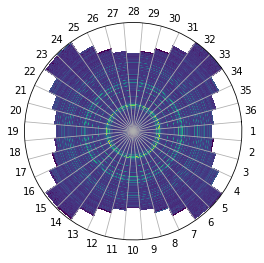

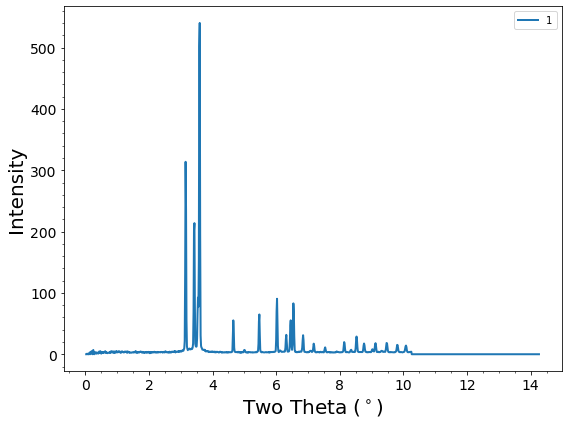

In [1]:
%matplotlib inline

from xrdfit.spectrum_fitting import PeakParams, FitSpectrum

spectral_data = FitSpectrum('../example_data/example_data_large/adc_065_TI64_NDload_900C_15mms_00001.dat', 90)
spectral_data.plot_polar()
spectral_data.plot(1)

Zoom in a bit.

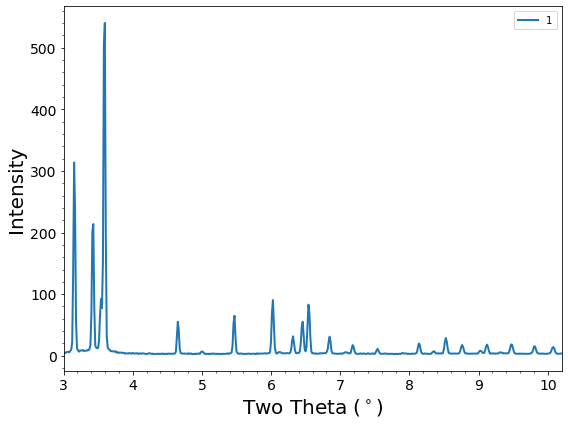

In [2]:
spectral_data.plot(1, (3, 10.2))

Mostly singlets here but some interesting multiplets.

Next use the auto detect to get a starting point.

In [3]:
spectral_data.detect_peaks(1, (3, 10.2))

[PeakParams('0', (3.06, 3.25)),
PeakParams('3', (4.54, 4.76)),
PeakParams('4', (4.86, 5.14)),
PeakParams('5', (5.36, 5.58)),
PeakParams('6', (5.92, 6.14)),
PeakParams('7', (6.21, 6.43)),
PeakParams('8', (6.35, 6.57)),
PeakParams('9', (6.42, 6.67)),
PeakParams('10', (6.72, 6.97)),
PeakParams('11', (7.05, 7.3)),
PeakParams('12', (7.42, 7.67)),
PeakParams('13', (8.01, 8.26)),
PeakParams('14', (8.23, 8.48)),
PeakParams('15', (8.39, 8.66)),
PeakParams('16', (8.62, 8.9)),
PeakParams('17', (8.98, 9.26)),
PeakParams('18', (9.32, 9.62)),
PeakParams('19', (9.65, 9.96)),
PeakParams('20', (9.93, 10.23))]


These PeakParams aren't likely to be perfect, some peaks may be missed or misidentified so it is worth plotting them to check that they are OK. In general the fits work best where there is at least 5 data points at the baseline either side of the peak. Where peaks are closer together than this it can often be better to combine the peaks into a multiplet fit rather than trying to fit them separately.

Here the graph is a bit small to see the detail so I chop it up into a couple of subsections to evaluate the quality of the estimated PeakParams.

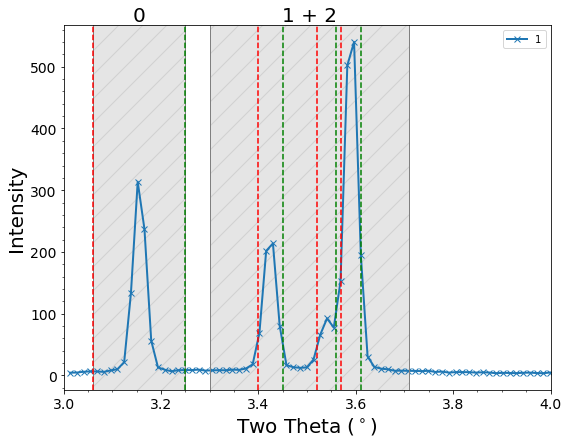

In [4]:
spectral_data.plot_peak_params([PeakParams('0', (3.06, 3.25)),
                               PeakParams('1 + 2', (3.30, 3.71), [(3.40, 3.45), (3.52, 3.56), (3.57, 3.61)])]
                               , 1, (3, 4), show_points=True)

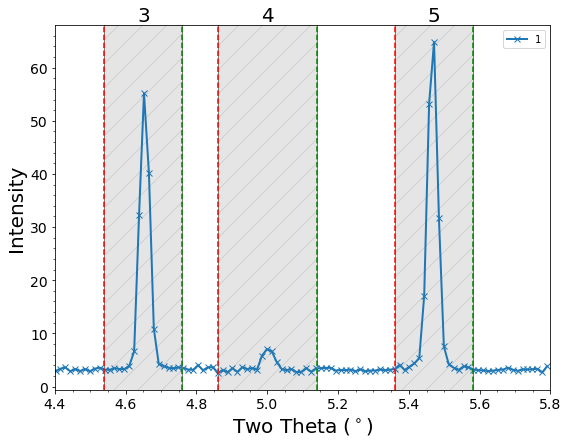

In [5]:
spectral_data.plot_peak_params([PeakParams('3', (4.54, 4.76)),
                                PeakParams('4', (4.86, 5.14)),
                                PeakParams('5', (5.36, 5.58))], 
                                1, (4.4, 5.8), show_points=True)

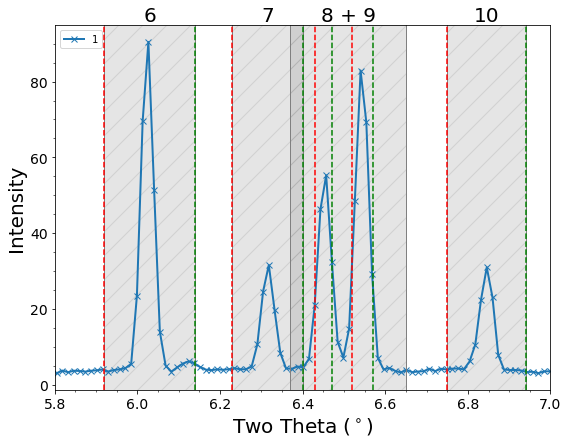

In [6]:
spectral_data.plot_peak_params([PeakParams('6', (5.92, 6.14)),
                                PeakParams('7', (6.23, 6.40)),
                                PeakParams('8 + 9', (6.37, 6.65), [(6.43, 6.47), (6.52, 6.57)]),
                                PeakParams('10', (6.75, 6.94))], 
                               1, (5.8, 7), show_points=True)

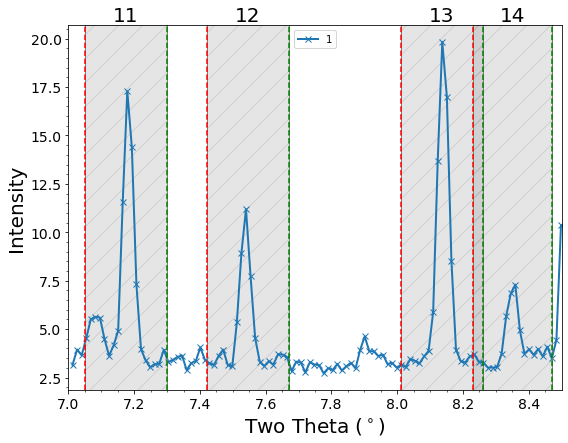

In [7]:
spectral_data.plot_peak_params([PeakParams('11', (7.05, 7.3)),
                                PeakParams('12', (7.42, 7.67)),
                                PeakParams('13', (8.01, 8.26)),
                                PeakParams('14', (8.23, 8.47))],
                               1, (7, 8.5), show_points=True)

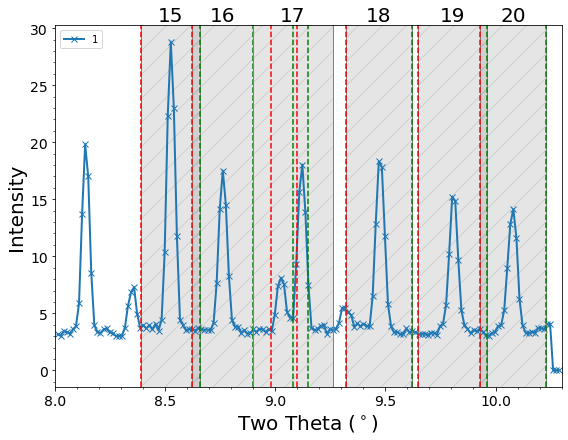

In [8]:
spectral_data.plot_peak_params([PeakParams('15', (8.39, 8.66)),
                                PeakParams('16', (8.62, 8.9)),
                                PeakParams('17', (8.90, 9.26), [(8.98, 9.08), (9.10, 9.15)] ),
                                PeakParams('18', (9.32, 9.62)),
                                PeakParams('19', (9.65, 9.96)),
                                PeakParams('20', (9.93, 10.23))],
                              1, (8, 10.3), show_points=True)

Finally I collate the adjusted PeakParams, renumber them (you might want to put physically meaningful names here like crystal lattice names) and then run the fit.

Fitting complete.


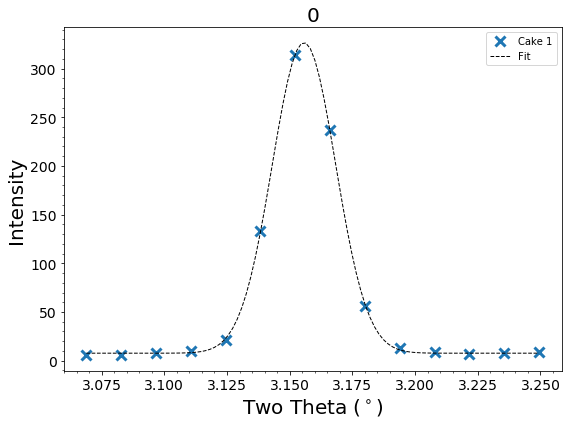

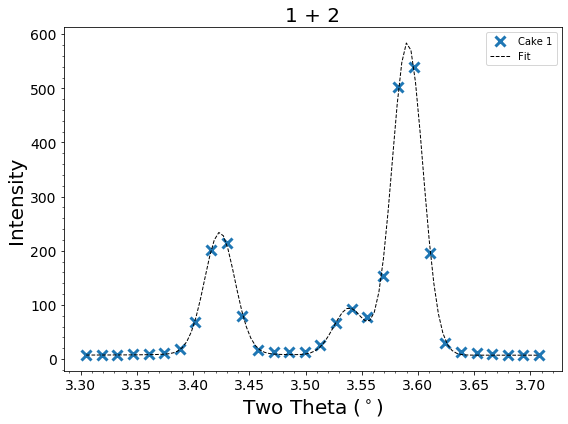

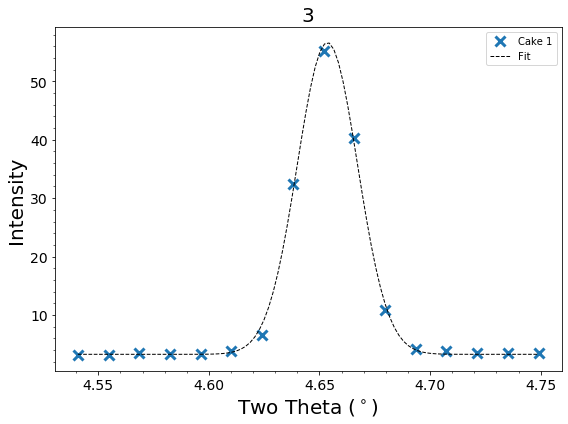

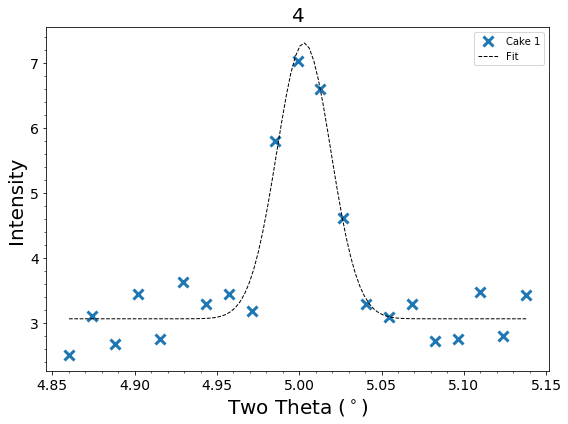

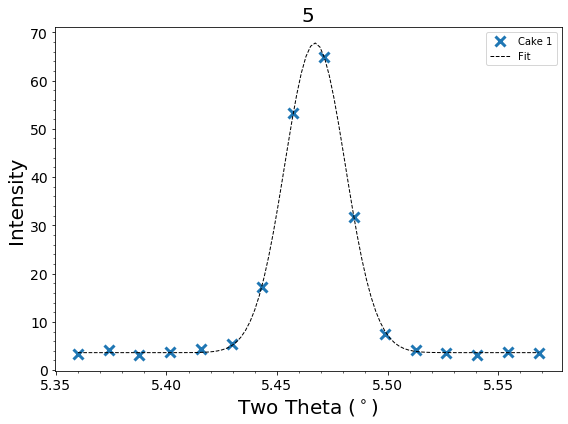

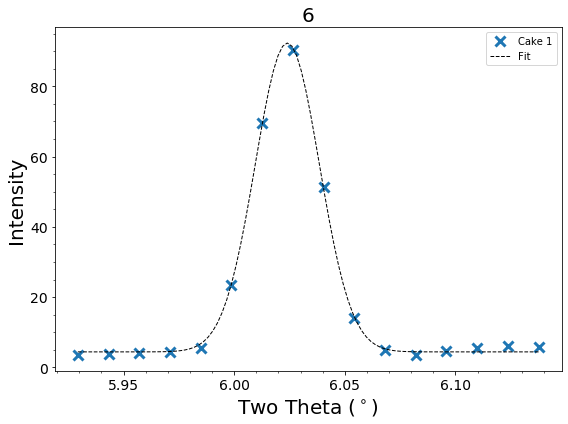

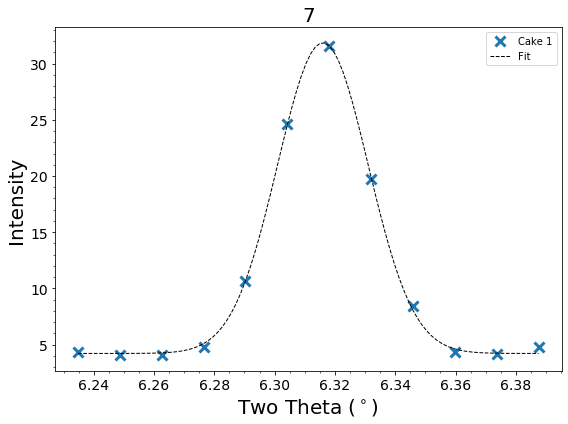

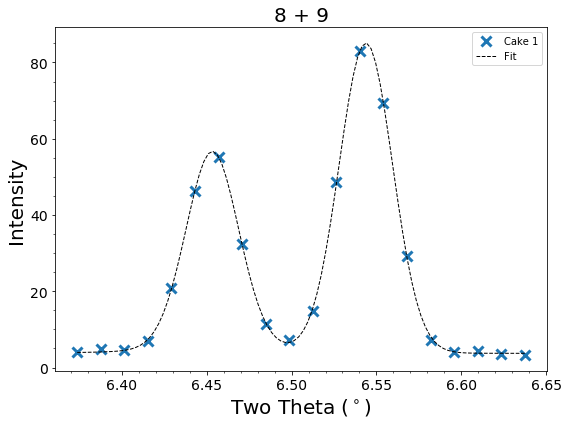

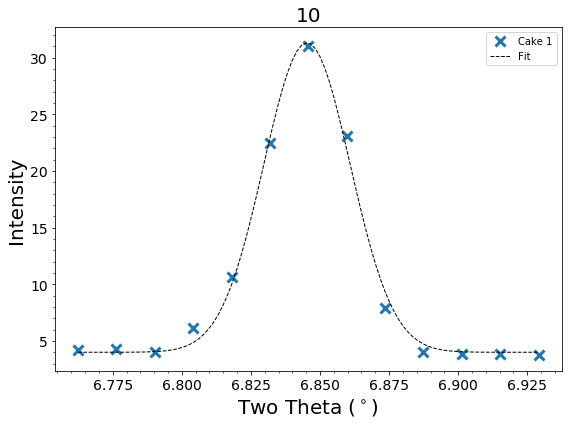

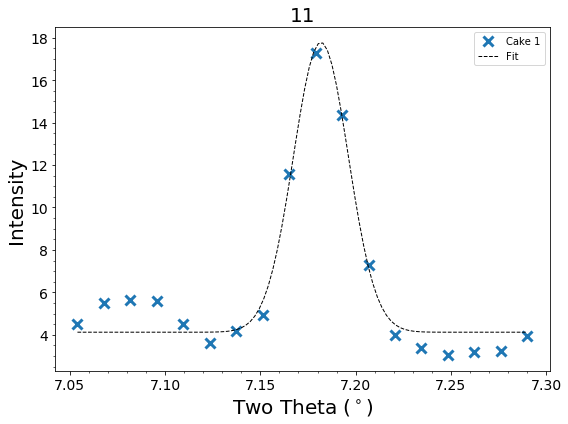

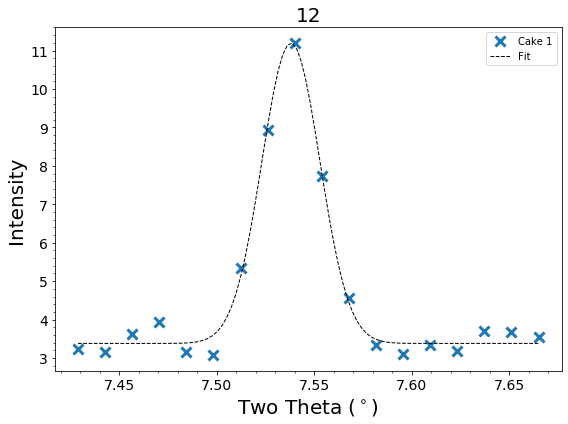

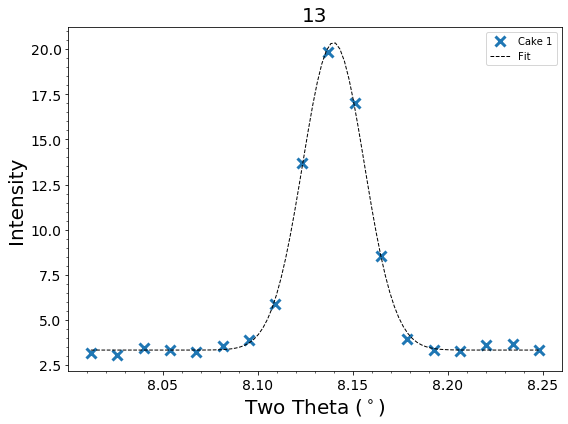

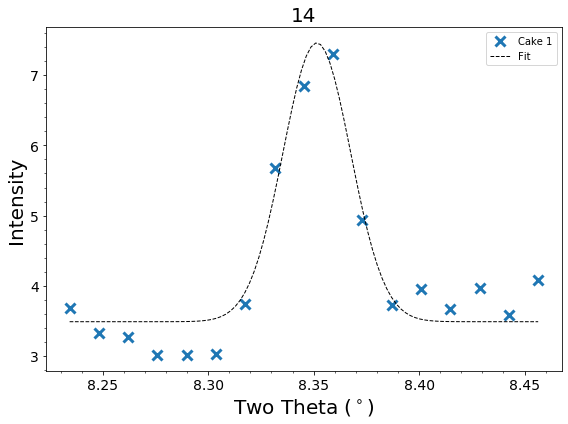

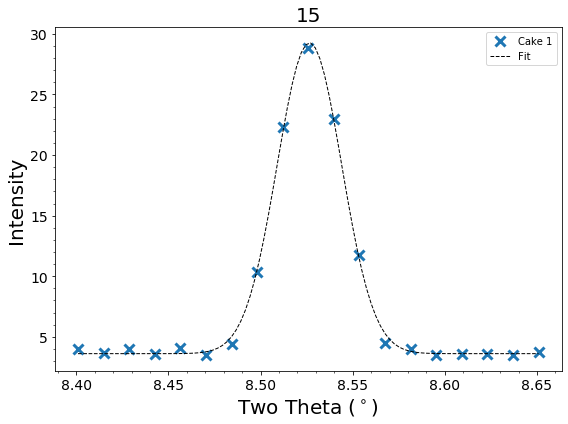

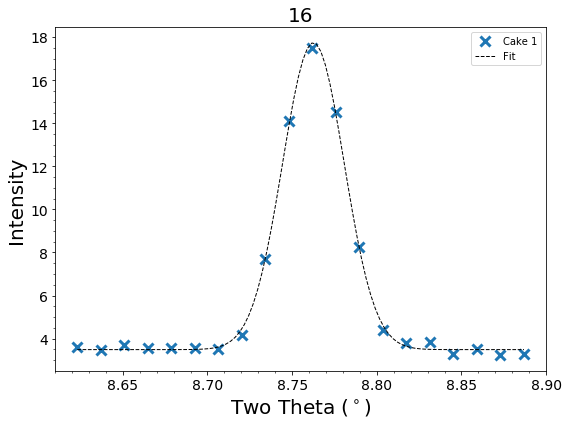

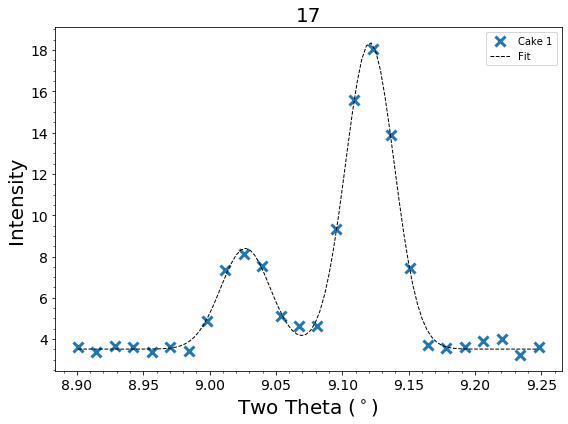

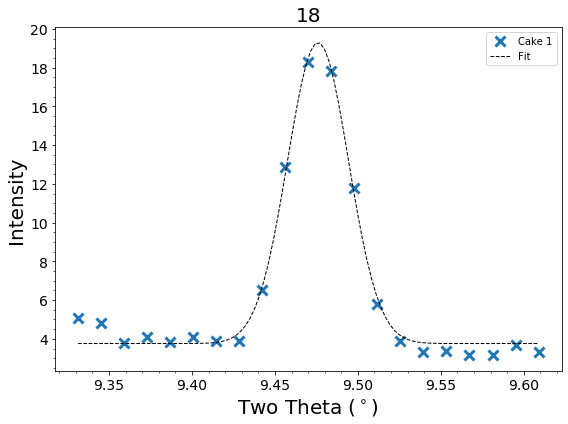

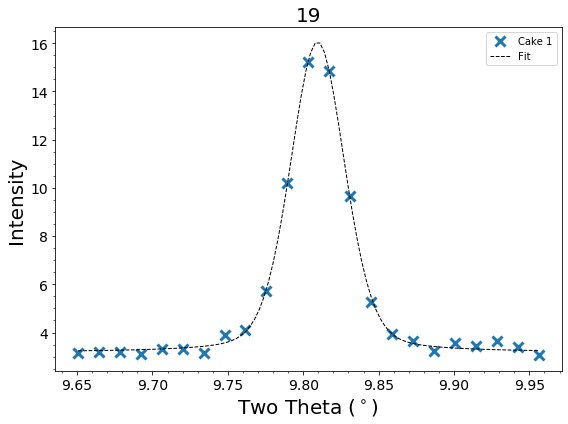

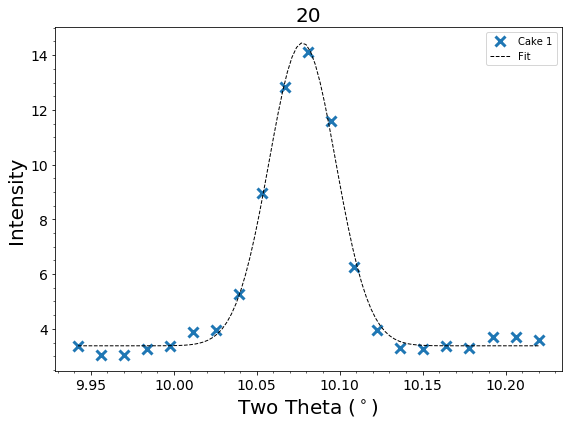

In [9]:
peak_params = [PeakParams('0', (3.06, 3.25)),
               PeakParams('1 + 2', (3.30, 3.71), [(3.40, 3.45), (3.52, 3.56), (3.57, 3.61)]),
               PeakParams('3', (4.54, 4.76)),
               PeakParams('4', (4.86, 5.14)),
               PeakParams('5', (5.36, 5.58)),
               PeakParams('6', (5.92, 6.14)),
               PeakParams('7', (6.23, 6.40)),
               PeakParams('8 + 9', (6.37, 6.65), [(6.43, 6.47), (6.52, 6.57)]),
               PeakParams('10', (6.75, 6.94)),
               PeakParams('11', (7.05, 7.3)),
               PeakParams('12', (7.42, 7.67)),              
               PeakParams('13', (8.01, 8.26)), 
               PeakParams('14', (8.23, 8.47)),
               PeakParams('15', (8.39, 8.66)),
               PeakParams('16', (8.62, 8.9)),
               PeakParams('17', (8.90, 9.26), [(8.98, 9.08), (9.10, 9.15)] ),
               PeakParams('18', (9.32, 9.62)),
               PeakParams('19', (9.65, 9.96)),
               PeakParams('20', (9.93, 10.23))]
spectral_data.fit_peaks(peak_params, 1)

for fit in spectral_data.fitted_peaks:
    fit.plot()

All initial fits look pretty good.

## 5.2 Time fitting